In [19]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import csv
from collections import deque

In [41]:
data = np.genfromtxt("C:\data-nonlinear.txt", delimiter=',')
x = data[:, 0]
y = data[:, 1]
label = data[:, 2]
x_label0 = x[label == 0]
x_label1 = x[label == 1]
y_label0 = y[label == 0]
y_label1 = y[label == 1]
iters = deque()
accuracys1 = deque()
accuracys2 = deque()
accuracys3 = deque()
accuracys4 = deque()
accuracys5 = deque()
train_costs1 = deque()
train_costs2 = deque()
train_costs3 = deque()
train_costs4 = deque()
train_costs5 = deque()
theta_datas1 = deque()
theta_datas2 = deque()
theta_datas3 = deque()
theta_datas4 = deque()
theta_datas5 = deque()
lambda_datas = deque()

In [23]:
def sigmoidFunction(z):
  result = 1/(1 + np.exp(-z))
  return result

In [25]:
def gFunction(x_data, y_data, theta_data):  #단일 x,y와 모든 theta 계산
  result = 0
  for i in range(0, 10):
    for j in range(0, 10):
      result += theta_data[i][j] * np.power(x_data, i) * np.power(y_data, j)
  return result

In [27]:
def objectiveFunction(x_data, y_data, class_data, theta_data, lambda_data):
  cost = 0
  predictions = deque()
  for i in range(0, 118):
    estimate = gFunction(x_data[i], y_data[i], theta_data)
    #print(estimate)
    #print("Estimate",estimate)
    predictions.append((-class_data[i]*np.log(estimate)) - (1-class_data[i])*np.log(1-estimate))
    #print("predictions",predictions)
  cost = np.sum(predictions) / 118                          #data fidelity term
  cost += lambda_data / 2 * np.sum(np.square(theta_data))   #regularization term
  #print("Cost출력",cost)
  return cost

In [31]:
def gradientDescent(x_data, y_data, class_data, theta_data, lambda_data):
  lr = 3e-2
  for i in range(0, 10):
    for j in range(0, 10):
      estimate = 0
      for k in range(0, 118):
        estimate += gFunction(x_data[k], y_data[k], theta_data) - class_data[k] * (np.power(x_data[k],i) * np.power(y_data[k],j))
      theta_data[i][j] -= lr * (estimate/118 + lambda_data * theta_data[i][j])
  return theta_data

In [42]:
def main():
  theta_data = np.zeros([10,10])  #Initialization
  
  for iter in range(0, 500):    
    lambda_data = 0.00001
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs1.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys1.append(accuracy)
    iters.append(iter)
    theta_datas1.append(theta_data)
    lambda_datas.append(lambda_data)

  ## 2번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 500):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys2.append(accuracy)

    lambda_data = 5
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs2.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    theta_datas2.append(theta_data)
    lambda_datas.append(lambda_data)

  ## 3번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 500):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys3.append(accuracy)

    lambda_data = 50
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs3.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    theta_datas3.append(theta_data)
    lambda_datas.append(lambda_data)

"""
  ## 4번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 500):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 0.1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys4.append(accuracy)

    lambda_data = 1
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs4.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    theta_datas4.append(theta_data)
    lambda_datas.append(lambda_data)

  ## 5번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 500):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys5.append(accuracy)

    lambda_data = 10
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs5.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    theta_datas5.append(theta_data)
    lambda_datas.append(lambda_data)
"""
if __name__ == "__main__":
  main()

C:\Users\Administrator\Anaconda3\envs\Starcraft\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Administrator\Anaconda3\envs\Starcraft\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Administrator\Anaconda3\envs\Starcraft\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


Plotting the training data


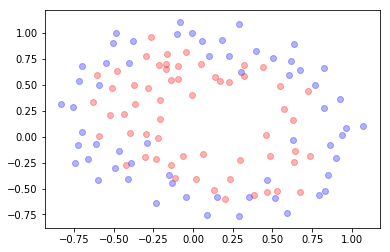

In [44]:
print("Plotting the training data")
plt.figure()
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

No handles with labels found to put in legend.


Plotting the Training Error


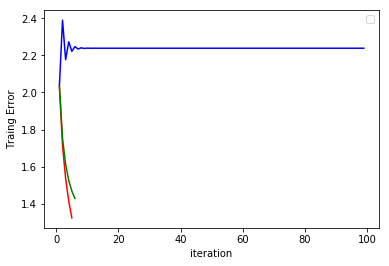

In [45]:
print("Plotting the Training Error")
plt.plot(iters, train_costs1, 'r')
plt.plot(iters, train_costs2, 'g')
plt.plot(iters, train_costs3, 'b')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('Traing Error')
plt.show()

In [46]:
lambda1 = lambda_datas[0]
lambda2 = lambda_datas[1]
lambda3 = lambda_datas[2]
print("lambda1 :\033[31m",lambda1,"\033[0m")
print("lambda2 :\033[32m",lambda2,"\033[0m")
print("lambda3 :\033[34m",lambda3,"\033[0m")

lambda1 : 1e-05 
lambda2 : 1e-05 
lambda3 : 1e-05 


No handles with labels found to put in legend.


Plotting the Training Accuracy


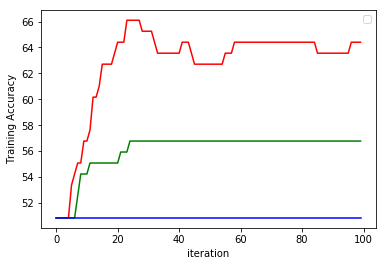

In [48]:
print("Plotting the Training Accuracy")
plt.plot(iters, accuracys1, 'r')
plt.plot(iters, accuracys2, 'g')
plt.plot(iters, accuracys3, 'b')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('Training Accuracy')
plt.show()

In [49]:
print("Final Training Accuracy :\033[31m",accuracys1[-1],"% \033[0m")
print("Final Training Accuracy :\033[32m",accuracys2[-1],"% \033[0m")
print("Final Training Accuracy :\033[34m",accuracys3[-1],"% \033[0m")
print("Final Training Accuracy : ",accuracys4[-1],"%")
print("Final Training Accuracy : ",accuracys5[-1],"%")

Final Training Accuracy : 64.40677966101694 % 
Final Training Accuracy : 56.779661016949156 % 
Final Training Accuracy : 50.847457627118644 % 


IndexError: deque index out of range

No handles with labels found to put in legend.


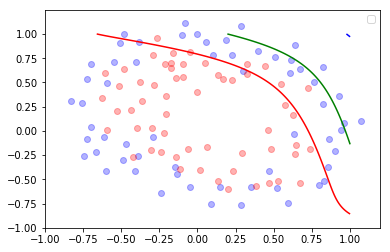

In [52]:
theta_1 = theta_datas1[-1]
theta_2 = theta_datas2[-1]
theta_3 = theta_datas3[-1]

Xmesh, Ymesh = np.meshgrid(np.linspace(-1.0, 1.0, 300), np.linspace(-1.0, 1.0, 300))

Z1 = gFunction(Xmesh, Ymesh, theta_1)
Z2 = gFunction(Xmesh, Ymesh, theta_2)
Z3 = gFunction(Xmesh, Ymesh, theta_3)
fig = plt.figure()
levels = [0]
graph1 = plt.contour(Xmesh, Ymesh, Z1, levels, colors = 'red')
graph2 = plt.contour(Xmesh, Ymesh, Z2, levels, colors = 'green')
graph3 = plt.contour(Xmesh, Ymesh, Z3, levels, colors = 'blue')
graph4 = plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
graph5 = plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.legend()
plt.show()